In [2]:
NAME = "Md Ibrahim Alif"
ID = "22101221"
SECTION = "14"

# Instructions:

This is your special assessment for CSE330 Lab. ***Please read the instructions carefully!***

1. You must rename this file as "ID_Name_Section_SA.ipynb". Example: "21212121_Niloy Farhan_01-SA.ipynb".
2. There are 4 tasks and each task have several substasks. This tasks are based on the content of lab 5 and lab 6.
3. You must use designated cells for each task. You should not use additional cells for codes of a task.
4. Some task may have no output. It will be mentioned in the designated cells.
5. Not a single line of code of this assessment should be written by AI. If you do, karma will hit you back. ;)
6. **Plagarism can lead to a zero mark in Final Assessment.**
7. If you have any queries, reach out to your lab faculties.


**Best of luck!**

# Task1.


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{1.1}$$

a. Plot the function for $$-2.5 \le x \le 1.5$$

b. What is the actual slope of $f(x)$ at $x = 0 , -1.18625$ ?  Print $f'(x)$ and plot $f'(x)$ at $ -2 \le x \le 1.2$.

For c to e, assume step size is $0.1$.

c. Use forward differntiation to figure out the slope at $x = 0 , -1.18625$.

d. Use backward differntiation to figure out the slope at $x = 0 , -1.18625$.

e. Use central differntiation to figure out the slope at $x = 0 , -1.18625$.

f. Compare the error of each method with actual differentiation at $x = 0 , -1.18625$ by showing in a Pandas Dataframe.

g. plot error vs h curves with proper label and color for each method at $x = 0$ and $h = [0.55, 0.3, .17, 0.1, 0.055, 0.03, 0.017, 0.01]$.


In [3]:
# Import cells. This is done for you!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

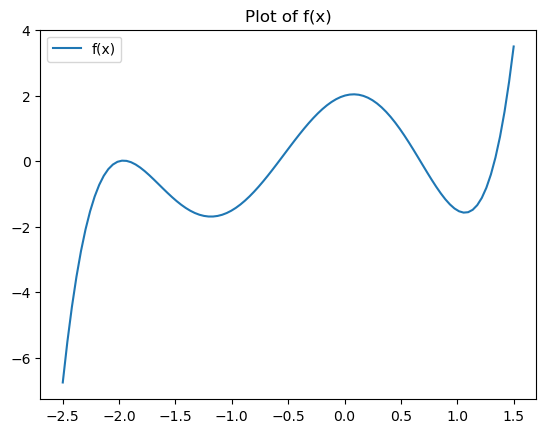

In [4]:
#1.a This cell should plot a graph. You must use polynomial class.
p = Polynomial([2, 1, -6, -2, 2.5, 1])
data = p.linspace(domain=[-2.5, 1.5])
fig, ax = plt.subplots()
ax.plot(data[0], data[1], label='f(x)')
ax.set_title('Plot of f(x)')
ax.legend()

Slope at x=0: 1.0
Slope at x=-1.18625: -9.340808105218201e-06


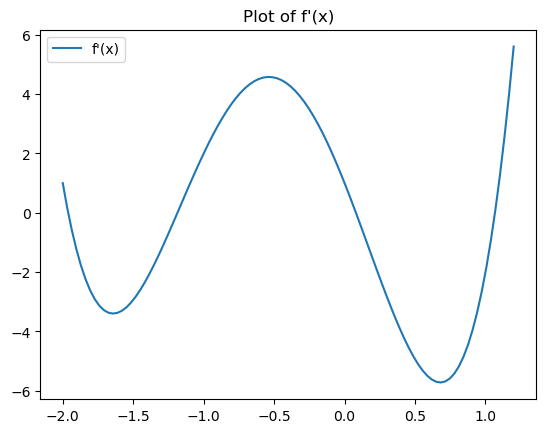

In [5]:
#1.b This cell should print and plot a graph.
p = Polynomial([2, 1, -6, -2, 2.5, 1])
p_prime = p.deriv(1)

print(f"Slope at x=0: {p_prime(0)}")
print(f"Slope at x=-1.18625: {p_prime(-1.18625)}")

fig, ax = plt.subplots()
data2 = p_prime.linspace(domain=[-2, 1.2])
ax.plot(data2[0], data2[1], label="f'(x)")
ax.set_title("Plot of f'(x)")

ax.legend()

In [6]:
#1.c This cell should print
def forward_diff(f, h, x):
    return (f(x+h) - f(x)) / h

h = 0.1
x1 = 0
x2 = -1.18625
forward = {}
forward[x1] = forward_diff(p, h, x1)
forward[x2] = forward_diff(p, h, x2)

print(f"Slope at x = {x1} using forward differentiation: {forward[x1]}")
print(f"Slope at x = {x2} using forward differentiation: {forward[x2]}")

Slope at x = 0 using forward differentiation: 0.3826000000000018
Slope at x = -1.18625 using forward differentiation: 0.5520088838012782


In [7]:
#1.d This cell should print
def backward_diff(f, h, x):
    return (f(x)-f(x-h)) / h

h = 0.1
x1 = 0
x2 = -1.18625

backward = {}
backward[x1] = backward_diff(p, h, x1)
backward[x2] = backward_diff(p, h, x2)

print(f"Slope at x = {x1} using backward differentiation: {backward[x1]}")
print(f"Slope at x = {x2} using backward differentiation: {backward[x2]}")

Slope at x = 0 using backward differentiation: 1.5776000000000012
Slope at x = -1.18625 using backward differentiation: -0.5476397529174859


In [8]:
#1.e This cell should print
def central_diff(f, h, x):
    return (f(x+h)-f(x-h)) / (2*h)

h = 0.1
x1 = 0
x2 = -1.18625

central = {}
central[x1] = central_diff(p, h, x1)
central[x2] = central_diff(p, h, x2)

print(f"Slope at x = {x1} using central differentiation: {central[x1]}")
print(f"Slope at x = {x2} using central differentiation: {central[x2]}")

Slope at x = 0 using central differentiation: 0.9801000000000015
Slope at x = -1.18625 using central differentiation: 0.002184565441896158


In [9]:
#1.f This cell should show a table
def compare(f, f_prime, h, x):
    Result = {'x' : [], "Actual" : [],"FD": [], "BD" : [], "CD": [], "FD Error" : [], "BD Error": [], "CD Error" : []}
    for i in x:
        Y_correct = f_prime(i)
        Result['x'].append(i)
        Result['Actual'].append(f_prime(i))
        Result['FD'].append(forward[i])
        Result['BD'].append(backward[i])
        Result['CD'].append(central[i])
        Result['FD Error'].append(abs(forward[i] - Y_correct))
        Result['BD Error'].append(abs(backward[i] - Y_correct))
        Result['CD Error'].append(abs(central[i] - Y_correct))

    df = pd.DataFrame(Result)
    return df

h = 0.1
x = [0, -1.18625]

compare(p, p_prime, h, x)

,x,Actual,FD,BD,CD,FD Error,BD Error,CD Error
0,0.00000,1.000000,0.382600,1.57760,0.980100,0.617400,0.57760,0.019900
1,-1.18625,-0.000009,0.552009,-0.54764,0.002185,0.552018,0.54763,0.002194


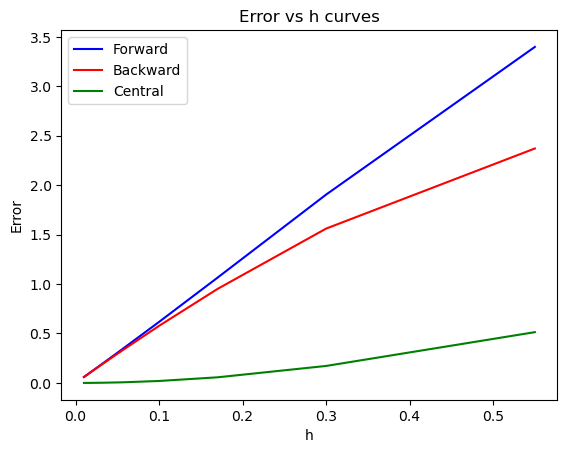

In [10]:
#1g This cell should plot a graph.
h_val = [0.55, 0.3, .17, 0.1, 0.055, 0.03, 0.017, 0.01]
x = 0
forward_err = [abs(p_prime(x) - forward_diff(p, h, x)) for h in h_val]
backward_err = [abs(p_prime(x) - backward_diff(p, h, x)) for h in h_val]
central_err = [abs(p_prime(x) - central_diff(p, h, x)) for h in h_val]

plt.plot(h_val, forward_err, label='Forward', color='blue')
plt.plot(h_val, backward_err, label='Backward', color='red')
plt.plot(h_val, central_err, label='Central', color='green')

plt.xlabel('h')
plt.ylabel('Error')
plt.title('Error vs h curves')

plt.legend()

plt.show()

# Task 2.

a. Propose a better technique for numerical differentiation that provides higher accuracy than the methods you have worked so far. You need to write a function for your proposed technique.

Let, $$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{2.1}$$

b. Using your proposed method, what is the slope of $f(x)$  at $x=0,−1.18625$ and step size = 0.1?

c. Compare the error of your method with  actual, forward, backward and central differentiation at  $x=0,−1.18625$  by showing in Pandas Dataframe.

d. Plot actual derivative, Forward derivative, Backward derivative, Central derivative and the derivative from your proposed method in a graph. Here, $$h = 0.1, -2 \le x \le 1.2$$

In [11]:
#2a. This cell should not have any output.
Proposed_Method_Name = "Richardson Extrapolation"

#Write Code here
def dh(f, h, x):
    return (f(x+h)-f(x-h)) / (2*h)

def dh1(f, h, x):
    return (4*dh(f, h/2, x) - dh(f, h, x)) / 3

In [12]:
#2b. This cell should print
p = Polynomial([2, 1, -6, -2, 2.5, 1])
x = [0, -1.18625]
h = 0.1
re = {}
for i in x:
  re[i] = dh1(p, h, i)
  print(f"Slope of f(x) at x = {i}: {re[i]}")

Slope of f(x) at x = 0: 0.9999750000000011
Slope of f(x) at x = -1.18625: -3.4340808106048115e-05


In [13]:
#2c.This cell should print

def compare1(f, f_prime, h, x):
    Result = {'x' : [], "Actual" : [],"FD": [], "BD" : [], "CD": [],"RE": [], "FD Error" : [], "BD Error": [], "CD Error" : [], "RE Error" : []}
    # write code here
    for i in x:
        Y_correct = f_prime(i)
        Result['x'].append(i)
        Result['Actual'].append(f_prime(i))
        Result['FD'].append(forward[i])
        Result['BD'].append(backward[i])
        Result['CD'].append(central[i])
        Result['RE'].append(re[i])
        Result['FD Error'].append(abs(forward[i] - Y_correct))
        Result['BD Error'].append(abs(backward[i] - Y_correct))
        Result['CD Error'].append(abs(central[i] - Y_correct))
        Result['RE Error'].append(abs(re[i] - Y_correct))

    df = pd.DataFrame(Result)
    return df

x = [0, -1.18625]
p_prime = p.deriv(1)

compare1(p, p_prime, h, x)

,x,Actual,FD,BD,CD,RE,FD Error,BD Error,CD Error,RE Error
0,0.00000,1.000000,0.382600,1.57760,0.980100,0.999975,0.617400,0.57760,0.019900,0.000025
1,-1.18625,-0.000009,0.552009,-0.54764,0.002185,-0.000034,0.552018,0.54763,0.002194,0.000025


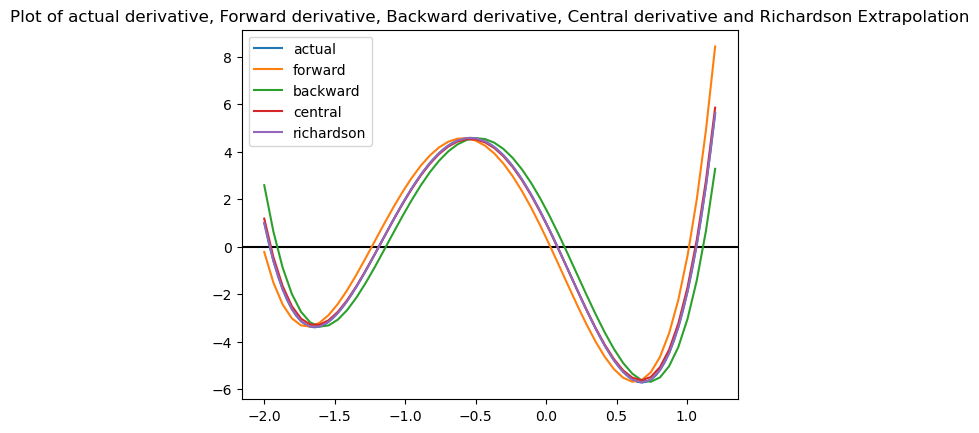

In [14]:
#2.d This cell should plot a graph.
h = 0.1

def draw_graph(f, ax, domain=[-10, 10], label=None):
    data = f.linspace(domain=domain)
    ax.plot(data[0], data[1], label=label)



fig, ax = plt.subplots()
ax.axhline(y=0, color='k')

draw_graph(p_prime, ax, [-2,1.2], 'actual')
# draw_graph(forward_diff, ax, [-2,1.2], 'forward')
# draw_graph(backward_diff, ax, [-2,1.2], 'backward')
# draw_graph(central_diff, ax, [-2,1.2], 'central')
x = np.linspace(-2, 1.2)
forward_derivative = [forward_diff(p, h, i) for i in x]
backward_derivative = [backward_diff(p, h, i) for i in x]
central_derivative = [central_diff(p, h, i) for i in x]
richardson_derivative = [dh1(p, h, i) for i in x]


plt.plot(x, forward_derivative, label='forward')
plt.plot(x, backward_derivative, label='backward')
plt.plot(x, central_derivative, label='central')
plt.plot(x, richardson_derivative, label='richardson')

plt.title('Plot of actual derivative, Forward derivative, Backward derivative, Central derivative and Richardson Extrapolation')

ax.legend()
plt.legend()
plt.show()

# Task 3.

Given,
$f(x) = \frac{-1}{13}x^3 + 2x^2 - 9.5x - 10\tag{3.1}$

a. (i) Write a python function that takes an input function and a list of intervals as a list and returns a dictionary that contains either root exists or not in each intervals.
Determine if root exists in $[(-20,-10),(-10,0), (0,10), (10,20), (20,30)]$.

(ii) Verify your method by ploting the function and the intervals.

In [15]:
#3a_i This cell should print
intervals = [(-20,-10),(-10,0), (0,10), (10,20), (20,30)]


def root_exists(p, intervals):
  result = {}
  for interval in intervals:
    a, b = interval
    if p(a) * p(b) < 0:
      result[interval] = True
    else:
      result[interval] = False
  return result

p = Polynomial([-10, -9.5, 2, -1/13])
root_exists(p, intervals)

{(-20, -10): False,
 (-10, 0): True,
 (0, 10): True,
 (10, 20): True,
 (20, 30): False}

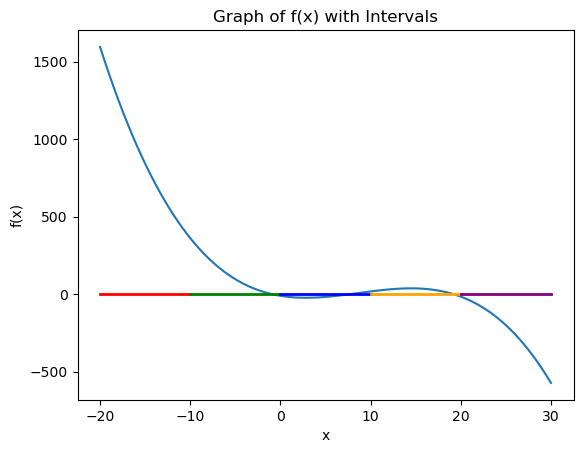

In [16]:
#3a_ii This cell should plot a graph.
x = np.linspace(-20, 30, 100)
y = p(x)

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Graph of f(x) with Intervals")

intervals = [(-20, -10), (-10, 0), (0, 10), (10, 20), (20, 30)]
colors = ['red', 'green', 'blue', 'orange', 'purple']

i = 0
for j in intervals:
  a, b = j
  plt.plot([a, b], [0, 0], color=colors[i], linewidth=2)
  i += 1

plt.show()

b. Using Bisection method, find roots of the function $3.1$ in these intervals $[(−20,−10),(−10,0),(0,10),(10,20),(20,30)]$ where root exists. The value of machine epsilon is, $\epsilon < 10^{-6}$


You can reuse the function of Task 3.a to find out the intervals that contains root.
Note: You should return 3 different roots for the function (3.1).

In [17]:
#3b This cell should print
def bisection(f, a, b):
  root = 0.0
  m = (a + b) / 2
  e = 1e-2
  # list_a = []
  # list_b = []
  # list_m = []
  # list_f = []

  while True:
      # list_a.append(a)
      # list_b.append(b)
      # list_m.append(m)
      # list_f.append(f(m))
      if abs(m - root) / abs(m) < e:
          break
      if f(a) * f(m) < 0:
          b = m
      else:
          a = m
      root = m
      m = (a + b) / 2
  return m


roots = []
for i in intervals:
  if root_exists(p, [i])[i]:
    a, b = i
    root = bisection(p, a, b)
    roots.append(root)

print(roots)

[-0.8837890625, 7.6953125, 19.21875]


c. Plot the f(x) along with the roots to check if your method is working correctly.

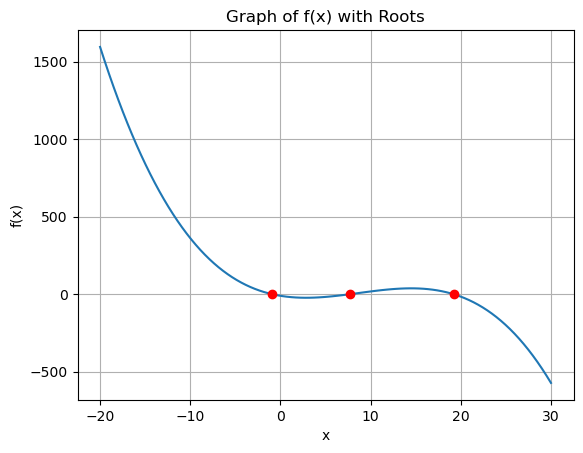

In [18]:
#3c This cell plot a graph.
x = np.linspace(-20, 30, 100)
y = p(x)

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Graph of f(x) with Roots")
plt.grid(True)

for root in roots:
  plt.plot(root, 0, 'ro')

plt.show()

Task4.


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + \frac{x}{2} + 2\tag{4.1}$$

a. Find the actual roots of $f(x)$ and print them.

b. Plot the function for $-2.5 \le x \le 1.5$, also point out the the found roots in the plot

c. The following $g_{1}(x)$ is given which is derived from Eq$(4.1)$, \\
   Use Contraction Mapping Theorem and calculate the value of λ for the given $g(x)$ $$g_{1}(x)= \frac{1}{2}(-x^5 - 2.5x^4 + 2x^3 + 6x^2 - 2)\tag{4.2}$$

d. Compute the convergence/divergence table using all the calculated roots for the given $g_{1}(x)$ and prove the whole $g_{1}(x)$ is divergent

Given,

$$g_{2}(x)= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 -2x^3 + \frac{1}{2}x + 2)}\tag{4.3}$$
$$g_{3}(x) = \sqrt[\leftroot{-1}\uproot{2}\scriptstyle 4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - \frac{1}{2}x - 2)}\tag{4.4}$$
e. Derive 2 more separate $g_{4}(x)$ and $g_{5}(x)$ from the given $f(x)$. Implement $g_{2}(x)$, $g_{3}(x)$, $g_{4}(x)$ and $g_{5}(x)$.

f. Apply Fixed Point Method on the $g_{2}(x)$, $g_{3}(x)$, $g_{4}(x)$ and $g_{5}(x)$. and find the approprate roots, show 20 iterations for each $g(x)$ for $x_{0}$ = 0.8 and show the convergence table using data from each iteration

g. Plot the $g(x)$s where actual roots were found along with $f(x)$.

In [19]:
#4a This cell should print
f = Polynomial([2, 0.5, -6, -2, 2.5, 1])
roots = f.roots()
print(roots)

[-2.22027583 -1.61803399 -0.65499178  0.61803399  1.37526761]


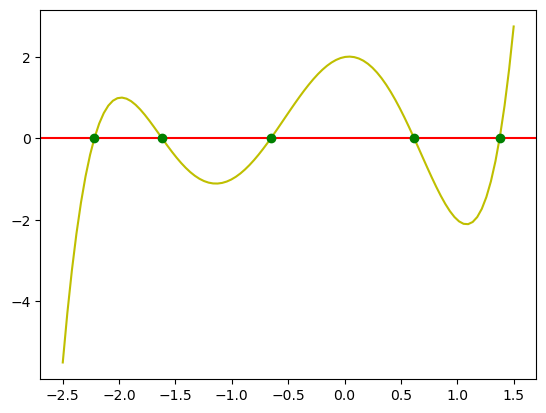

In [20]:
#4b This cell should print plot a graph
x = np.linspace(-2.5, 1.5, 100)
y = f(x)
dictionary = {
    'x': x,
    'y': y
}
plt.axhline(y=0, color='r')
plt.plot(x, y,'y')
plt.plot(f.roots(), [0.0]*5, 'go')


plt.show()

In [26]:
#4c This cell should print

g1 = 0.5 * Polynomial([-2, 0, 6, 2, -2.5, -1])
g1_prime = g1.deriv(1)
lam = 0
for i in roots:
    lamda = g1_prime(i)
    lam += lamda
    print(f"x = {i} : lamda: {lamda}")
lam

x = -2.220275831506549 : lamda: -4.5601479140102485
x = -1.6180339887498922 : lamda: 2.1909830056250494
x = -0.6549917792369001 : lamda: -1.698037036564977
x = 0.6180339887498945 : lamda: 3.309016994374947
x = 1.375267610743449 : lamda: -8.023065049424885


-8.781250000000114

In [22]:
#4d This cell should print
'''d. Compute the convergence/divergence table using all the calculated roots for
the given g1(x) and prove the whole g1(x) is divergent'''
results = []
for i in roots:
    lamda = abs(g1_prime(i))
    results.append({'x': i, 'lamda': lamda, 'result': 'divergent' if lamda>=1 else 'convergent'})

df = pd.DataFrame(results)
df

,x,lamda,result
0,-2.220276,4.560148,divergent
1,-1.618034,2.190983,divergent
2,-0.654992,1.698037,divergent
3,0.618034,3.309017,divergent
4,1.375268,8.023065,divergent


Given,

$$g_{2}(x)= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 -2x^3 + \frac{1}{2}x + 2)}\tag{4.3}$$
$$g_{3}(x) = \sqrt[\leftroot{-1}\uproot{2}\scriptstyle 4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - \frac{1}{2}x - 2)}\tag{4.4}$$
e. Derive 2 more separate $g_{4}(x)$ and $g_{5}(x)$ from the given $f(x)$. Implement $g_{2}(x)$, $g_{3}(x)$, $g_{4}(x)$ and $g_{5}(x)$.

In [23]:
#4e This cell have no outputs
def g2(x):
  p = Polynomial([2/6, 0.5/6, 0/6, -2/6, 2.5/6, 1/6])
  return np.power(np.abs(p(x)), 1/2)

def g3(x):
  p = Polynomial([-2/2.5, -0.5/2.5, 6/2.5, 2/2.5, 0, -1/2.5])
  # return np.power(p(x), 1/4)
  return np.power(np.abs(p(x)), 1/4)

g4 = Polynomial([-2, 0.5, 6, 2, -2.5, -1])
def g5(x):
  p = Polynomial([2, 0.5, -5, -2, 2.5, 1])
  return np.power(np.abs(p(x)), 1/2)

f. Apply Fixed Point Method on the $g_{2}(x)$, $g_{3}(x)$, $g_{4}(x)$ and $g_{5}(x)$. and find the approprate roots, show 20 iterations for each $g(x)$ for $x_{0}$ = 0.8 and show the convergence table using data from each iteration

In [24]:
#4f This cell should print
functions = [g2, g3, g4, g5]
num_iterations = 50
def fixed_point_iteration(g, num_iterations):
  a = 0.80
  g_a = []
  g_a.append(a)
  for i in range(num_iterations):
      if not np.isinf(a) and not np.isnan(a):
        a = g(a)
      g_a.append(a)
      
            

  return g_a


results = []
for function in functions:
  result = fixed_point_iteration(function, num_iterations)
  results.append(result)

pd.DataFrame({'g2(x)':results[0], 'g3(x)':results[1], 'g4(x))':results[2], 'g5(x)':results[3]})

c:\Users\ibrah\Anaconda\Lib\site-packages\numpy\polynomial\polynomial.py:756: RuntimeWarning: overflow encountered in scalar multiply
  c0 = c[-i] + c0*x


,g2(x),g3(x),g4(x)),g5(x)
0,0.800000,0.800000,8.000000e-01,0.800000
1,0.674250,0.961461,1.912320e+00,0.687255
2,0.629830,1.126203,-2.412323e+01,0.209407
3,0.620179,1.249411,7.297948e+06,1.368317
4,0.618412,1.320336,-2.070160e+34,1.326353
5,0.618100,1.353509,3.802069e+171,1.020952
6,0.618046,1.367069,-inf,1.002079
7,0.618036,1.372244,-inf,1.000489
8,0.618034,1.374162,-inf,1.000121
9,0.618034,1.374865,-inf,1.000030


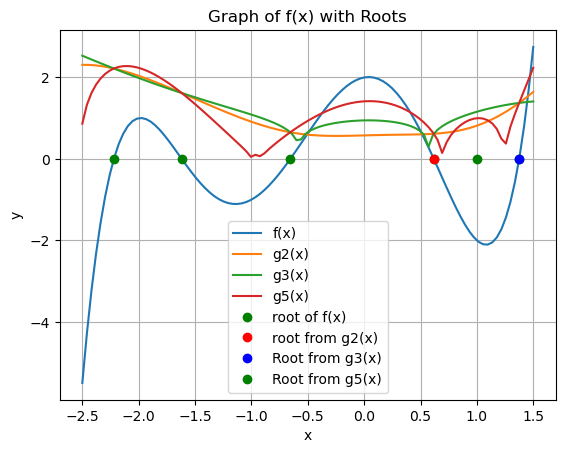

In [25]:
#4g This cell should plot a graph. Do not plot those g(x) which will not converge.
'''g. Plot the g(x)s where actual roots were found along with f(x).'''

x = np.linspace(-2.5, 1.5, 100)
y = f(x)

a = -2.5
b = 1.5

root_g2 = results[0][-1]
root_g3 = results[1][-1]
root_g5 = results[3][-1]


plt.plot(x, y, label='f(x)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph of f(x) with Roots")
plt.grid(True)

plt.plot(x, g2(x), label='g2(x)')
plt.plot(x, g3(x), label='g3(x)')
plt.plot(x, g5(x), label='g5(x)')

plt.plot(f.roots(), [0.0]*len(f.roots()), 'go', label='root of f(x)')
plt.plot(root_g2, 0, 'ro', label='root from g2(x)')
plt.plot(root_g3, 0, 'bo', label='Root from g3(x)')
plt.plot(root_g5, 0, 'go', label='Root from g5(x)')

plt.legend()
plt.show()